# Day 17: In-class Assignment: Introduction to Modeling with ODEs

### <p style="text-align: right;"> &#9989; Burke.</p>

#### <p style="text-align: right;"> &#9989; Group 10.</p>

### Goals for Today's In-Class Assignment
By the end of this assignment, you should be able to:
* Use Python to numerically solve an ordinary differential equation (ODE)
* Apply numerical integration to model population growth over time
* Visualize how the population changes over time by making plots
* Explore other ODE models

### Assignment instructions

Today, **with your group**, you're going to try to apply what you've learned in the pre-class assignment to explore modeling with ordinary differential equations.

**This assignment is due at the end of class** and should be uploaded into the appropriate "In-class Assignments" submission folder.  Submission instructions can be found at the end of the notebook.

## Part 1: Reviewing Observations from the Pre-class
-------------------
### &#9989;&nbsp; 1.1 Task

As a group, discuss your answers to Parts 3 and 4 of the pre-class. Summarize your discussion below. What parameters are changing and which are not? What differences did you have in your responses?

<font size="+3">&#9998;</font> **params are t, P0, k, C, and P(t),  t is x value P(t) is the y value - C is changed constant in 1st, k is changed constant in 2nd**

### &#9989;&nbsp; 1.2 Task

As a group, compare your `derivs` functions and your pseudocode for update equations. Determine how you as a group would combine `derivs` and the update equations loop to solve an ODE. In the cell below, summarize your discussion.

<font size="+3">&#9998;</font> **Δ𝑡**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
def derivs(P,k,C):
    # PUT YOUR INPUT(S) HERE, make sure to include current population value and the model parameter
    # Define the differential equation for the population model
    V = k*P*(1-(P/C))
    #return the value of the derivative
    return V

In [3]:
  #  X(t+Δt)=X(t)+VΔt
  #  V = ΔX/Δt
  #   V = X(t+Δt)+X(t)/Δt
  #  Xt+n = Xt+n + Δt*D(Xt+n)
       # Xn = Xn+Δ*V(Xn)
# Define a function that computes the derivatives

## STOP

Discuss your pseudocode for with an instructor before moving on!

## Part 2: Coding Update Equations
-------------------
### &#9989;&nbsp; 2.1 Task

In the cell below, fill in the `derivs` function with the code you agreed upon as a group.

In [4]:
# Define a function that computes the derivatives
def derivs(P,k,C):
    V = k*P*(1-(P/C))
    return V

### &#9989;&nbsp; 2.2 Task

To actually solve the ODE, you will need to code the update equations. Use your pseudo-code from the previous part to write an update equation that numerically integrates $\frac{dP}{dt}$. Use the following values for your solution:
- `P0 = 1.0e9`
- `k=0.01`
- `C=1.2e10`

Your code should result in a list (or array) of population values for the time interval from 0 to 500 years in steps of 50 years. **Your solution must call your `derivs` function.**

In [5]:
#Write your code here
def population(P,k,C,Δ=50,t0=0,tmax=501):   # PUT YOUR INPUT(S) HERE, make sure to include current population value and the model parameter
    import matplotlib.pyplot as plt
    t=list(range(t0,tmax,Δ))
    pop = P
    poplist = []
    for i in range(len(t)):
        poplist.append(pop)
        V = derivs(pop,k,C)
        pop = pop+(V)*Δ
    #return the value of the derivative
    return t, poplist

### &#9989;&nbsp; 2.3 Question

How do you know your code is working? Put any tests you ran in the cell below.

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500] [1000000000, 1458333333.3333333, 2098885995.3703701, 2964773892.157144, 4080915661.918357, 5427462132.8904295, 6913803815.83733, 8379010590.260711, 9643190115.736853, 10590155356.595074, 11212258431.691805]
11 11


Text(0, 0.5, 'population')

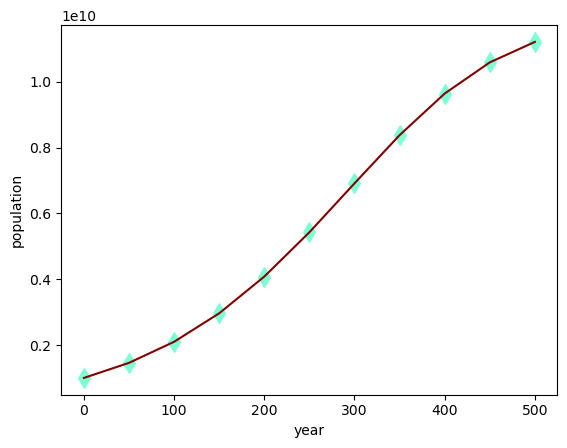

In [6]:
# put your tests here
t, poplist = population(1000000000,.01,12000000000,50,0,501)
print(t,poplist)
print(len(t),len(poplist))
plt.scatter(t,poplist,color='aquamarine',marker='d',s=100)
plt.plot(t,poplist,color='maroon')
plt.xlabel('year')
plt.ylabel('population')

--------------
## Part 3: Comparing Numerical Solution to Exact Solution

### &#9989;&nbsp; 3.1 Task 
What we have just done is a form of ***Numerical Integration.*** Numerical Integration is a way to *approximate* the integral of a differential equation, instead of the *exact solution,* which you get by taking the integral of $\frac{dP}{dt}$. 

The exact solution to the differential equation we've been working with is:
$$P(t) = \frac{C}{1 + Ae^{-k_R t}}$$
Where 
$$A = \frac{C-P_{0}}{P_{0}}$$
(We’ve actually worked with this equation before, when we first started making visualizations.)

Let’s compare the results of our numerical integration–which is an approximation–to the exact solution for $P(t)$ given above. We’ve provided you with a function for calculating the exact solution below. Calculate $P(t)$ using the exact solution.

In [7]:
def pop_func_exact_sol(time,pinitial,bigc,littlek):
    a = (bigc - pinitial)/pinitial
    pop = bigc/(1 + a*np.exp(-1.0*littlek*time))
    return pop 

In [8]:
#Write your code for calculating P using the exact solution above
poplistt = []
times = []
for i in range(0,501,50):
    poplistt.append(pop_func_exact_sol(i,1000000000,12000000000,.01))
    times.append(i)

### &#9989;&nbsp; 3.2 Task 

Make a single plot that shows your numerical solution from 2.2 along with the exact solution from the previous question. Make sure your plot include axes labels and a legend.

In [9]:
#Write your code for making a single plot showing your numerical solution vs the exact solution

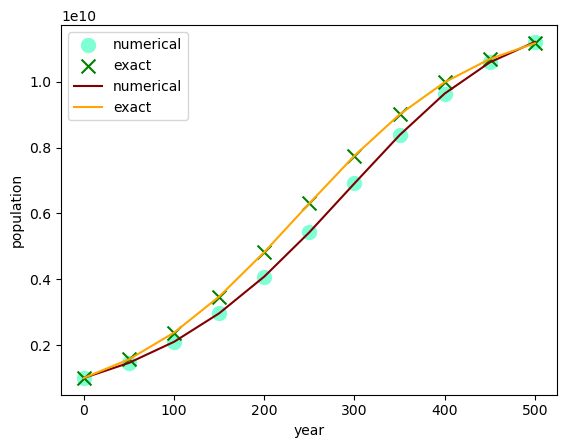

In [15]:
plt.scatter(t,poplist,color='aquamarine',marker='o',s=100,label='numerical')
plt.scatter(times,poplistt,color='green',marker='x',s=100,label='exact')
plt.plot(t,poplist,color='maroon',label='numerical')
plt.plot(times,poplistt,color='orange',label='exact')
plt.xlabel('year')
plt.ylabel('population')
plt.legend()

### &#9989;&nbsp; 3.3 Question 

How does the numerical integration solution compare to the exact solution? If your job involved modeling, would you feel confident using the results from the numerical solution? 

<font size="+3">&#9998;</font> **Numerical is slightly less than exact - no because its off by more than a billion people at some points**

--------------
## Part 4: Changing the Time Step

### &#9989;&nbsp; 4.1 Task 

We mentioned previously that, with numerical integration, our results are *approximate* solutions. There are certain things that we can do to improve our approximation.

Repeat steps 2.2, 3.1, and 3.2 using a time step of 20 years. That is, use numerical integration to find approximate values for P and use the function from 3.1 to find exact values for P using the new time step, and then plot the values against each other.

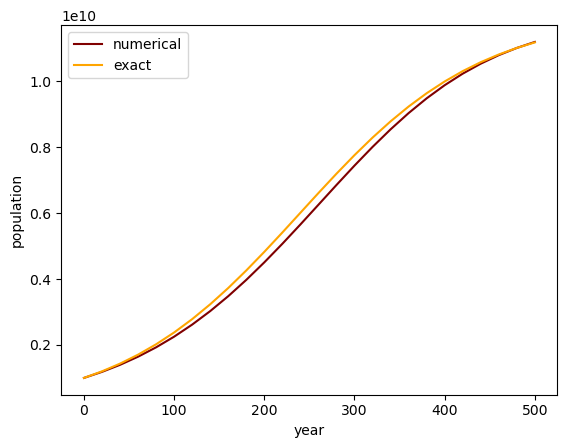

In [24]:
# put your code here
poplistt = []
times = []
for i in range(0,501,20):
    poplistt.append(pop_func_exact_sol(i,1000000000,12000000000,.01))
    times.append(i)
    
t, poplist = population(1000000000,.01,12000000000,20,0,501)
plt.plot(t,poplist,color='maroon',label='numerical')
plt.plot(times,poplistt,color='orange',label='exact')
plt.xlabel('year')
plt.ylabel('population')
plt.legend()

### &#9989;&nbsp; 4.2 Question

What effect does changing the time step have on your numerical solution?

<font size="+3">&#9998;</font> **Makes the numerical solution more exact**

### &#9989;&nbsp; 4.3 Question

What we’ve been doing for our numerical integration is the same as taking the [Riemann Sum](https://en.wikipedia.org/wiki/Riemann_sum), which involves calculating an integral by drawing little boxes (or other shapes) underneath a curve, calculating the area of each box, and summing them together. 

Consider the following figure, which shows Riemann sums for different step sizes. Use this figure to explain *why* changing the time step affects your numerical solution. (Remember: Integration is basically finding the area under a curve!)

<div align="center"><img src="https://raw.githubusercontent.com/msu-cmse-courses/cmse201-S22-data/main/Day-16/Riemann_sum_convergence.png" width=500px></div>




<font size="+3">&#9998;</font> **as the step gets smaller, the integral becomes more exact as the true total of area**

## Part 5 (Time Permitting): Exploring Another Model

There are several other simple ordinary differential equations that have solutions we can obtain similarly to the population growth model. [This website](http://sites.science.oregonstate.edu/math/home/programs/undergrad/CalculusQuestStudyGuides/ode/first/examples/examples.html#population) mentions a few of them.

### &#9989;&nbsp; 5.1 Question

Research one of the models on the website, and answer the following questions:
1. Describe the model and the system it is modeling.
2. What are the parameters that are changing?
3. What are the parameters that are constant?
4. What derivatives would you calculate in your `derivs` function?

<font size="+3">&#9998;</font> ** Electrical Currents   R*dI/dt + C*I(t) = dV/dt , changing are I, t, and V, constants are R, C, and dt,  derivs of I and V**

### &#9989;&nbsp; 5.2 Task

Write a new `derivs` function for your new model. Test it in the same way you tested the population growth model in the pre-class.

In [12]:
# put your code here
def derivs(I,R,C):
    R*dI/dt + C*I(t) = dV/dt
    
    dV/dt - R*dI/dt = C*I
    dV  = C*I*dt+R*dI
    
    return dV

def derivs(P,k,C):
    V = k*P*(1-(P/C))
    return V



𝑑𝑃𝑑𝑡=𝑘𝑃(1−𝑃/𝐶)

#R, C and V(t) and the intial current I(0) must be specified. RI'(t)+CI(t)=V’(t)

In [ ]:
def v_derivs(m,v,g=-9.8):
    V = (m*g)/m
    return V

In [ ]:
#Write your code here
def current(P,k,C,Δ=50,t0=0,tmax=501):   # PUT YOUR INPUT(S) HERE, make sure to include current population value and the model parameter
    import matplotlib.pyplot as plt
    t=list(range(t0,tmax,Δ))
    pop = P
    poplist = []
    for i in range(len(t)):
        poplist.append(pop)
        V = derivs(pop,k,C)
        pop = pop+(V)*Δ
    #return the value of the derivative
    return t, poplist

In [ ]:
t, poplist = population(1000000000,.01,12000000000,20,0,501)
plt.plot(t,poplist,color='maroon',label='numerical')
plt.plot(times,poplistt,color='orange',label='exact')
plt.xlabel('year')
plt.ylabel('population')
plt.legend()

---
## Assignment wrapup

Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!** 

In [13]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-ic-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the appropriate submission link, and upload it there.

&#169; Copyright 2023,  Michigan State University Board of Trustees